# Task One
### Initial setup

In [23]:
#check first five rows of data
import pandas as pd
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [24]:
#check shape of data
df.shape

(21613, 21)

In [25]:
#check columns
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Plotting scatter matrix. This will be used for questions 2-4 in part 1.

In [26]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# excluding id, date, lat, and long, as they probably do not fit the regression.
testdf = df.drop(['id', 'date', 'lat', 'long'], axis=1)
#scatter_matrix(testdf, figsize=(16,16), diagonal='kde')
#plt.show()

### 1. Is there any data missing (Nan)? If so, how would you remove it?

In [27]:
nulldf = df.isnull()
nulldf.sum(axis=0)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

The code above checks for null (Nan) values in each column and then provides the total number of missing values for each column. Because each column's total is 0, we know there are no values missing from the data.

### 2. What columns appear to offer the best hope of a linear approximation of price?
The scatter matrix above provides a way to compare the price to other attributes. Columns which offer the best linear approximations should:
* Appear to have a correlation between the column and price
* Not make a line which is too close to vertical or horizontal
* Have minimal fanning (i.e. data should be closely clumped along a line)

The following columns come closest to meeting those criteria:
* bathrooms (number of bathrooms in the house)
* sqft_living (living area in square feet) 
* grade (a score given to the house based on other criteria)
* sqft_above (living area in square feet, minus the basement)
* sqft_living15 (living area in square feet in 2015)


### 3. Which columns data are categorical? Which are numerical?
Categorical:
* waterfront
* view
* condition
* grade (could arguably be numerical)
* yr_built
* yr_renovated
* zipcode

Numerical:
* bedrooms
* bathrooms
* sqft_living
* sqft_lot
* floors
* sqft_above
* sqft_basement
* lat
* long
* sqft_living15
* sqft_lot15


### 4. Which is the "best" column to use for prediction? This is a judgement call, but I'd like to know how you justify it.
The number of bathrooms compared to the price has a clear trend, but there is enough fanning that it is likely not the most useful predictor. Sqft_living15 and sqft_above are both very similar to sqt_living but with slightly more fanned out data.

This leaves sqft_living and grade as possible predictors. Either one of them appears to be workable, but grade seems to have a slightly stronger correlation with price.

# Task Two

In [28]:
#load data 
import pandas as pd
df = pd.read_csv('kc_house_data.csv')

# make the predictor matrix and label vector
X = df[['grade']].as_matrix()
y = df[['price']].as_matrix()

# make the linear regression object
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# split the data for validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr.fit(X_train, y_train)
lr.coef_,lr.intercept_
train_predicted = lr.predict(X_train)
test_predicted = lr.predict(X_test)


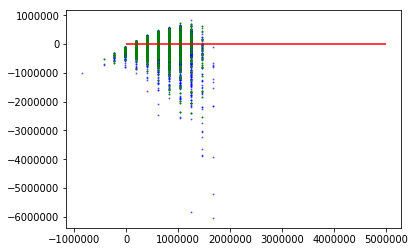

In [29]:
# plot residuals against predictions
import matplotlib.pyplot as plt
plt.scatter(train_predicted , train_predicted - y_train, color = 'b', s=1, alpha=0.5)
test_predicted = lr.predict(X_test)
plt.scatter(test_predicted , test_predicted - y_test, color = 'g', s=1)
plt.hlines(y=0, xmin=0, xmax = 5000000, color='r')
plt.show()

### 1. How might you choose which column is best for the predictive model?
In Task 1, I selected grade as a column for the predictive model based on it appearing to have a strong correlation with price.

### 2. Can you compare the quality of the different columns as predictors before you train a model? How?
Columns with large spreads or weak correlations are likely to be poor predictors.


### 3. How many rows are in the training data? How many rows in the test data?
We can see from the code below that there are 17,290 rows in the training data and 4,323 rows in the testing data (and that the total number of rows in the training and testing data sets add up to the 21,613 rows in the full data set)

In [30]:
# rows in training data
X_train.size

17290

In [31]:
# rows in testing data
X_test.size

4323

In [32]:
#total rows
X_train.size + X_test.size

21613

### 4. What do the metric scores tell you about the model?
As we can see from the metric scores below, this single-variant model is not a very effective predictor. The maximum score for the r2_score and explained_variance_score is 1.0, and the model scored approximately 0.454 in both, and the mean error was $178,967.

In [33]:
from sklearn import metrics

metrics.r2_score(y_test, test_predicted), metrics.explained_variance_score(y_test, test_predicted), metrics.mean_absolute_error(y_test, test_predicted)

(0.45072334489236499, 0.45077713869189118, 172677.64829203009)

However, these scores do not tell us that the model is less effective than other columns; e.g., using bathrooms as the single variable results in a model scoring closer to .3, with a mean error of $205,253

In [34]:
#load data 
import pandas as pd
df = pd.read_csv('kc_house_data.csv')

# make the predictor matrix and label vector
X = df[['bathrooms']].as_matrix()
y = df[['price']].as_matrix()

# make the linear regression object
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# split the data for validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr.fit(X_train, y_train)
lr.coef_,lr.intercept_
train_predicted = lr.predict(X_train)
test_predicted = lr.predict(X_test)

from sklearn import metrics

metrics.r2_score(y_test, test_predicted), metrics.explained_variance_score(y_test, test_predicted), metrics.mean_absolute_error(y_test, test_predicted)

(0.27897758948205109, 0.27899859611515188, 205300.67922410709)

# Task Three
### Initial Model

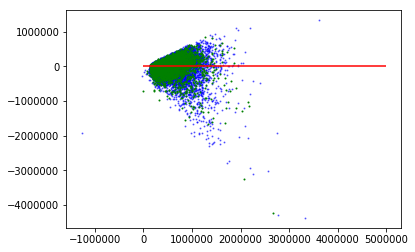

In [35]:
import pandas as pd
df = pd.read_csv('kc_house_data.csv')

#dropping categorical data for now
df = df.drop(['id', 'date', 'zipcode', 'waterfront', 'view', 'condition', 'grade', 'lat', 'long', 'yr_built', 'yr_renovated'], axis=1)

# Get X matrix and y vector.
X = df.drop(['price'], axis=1).as_matrix()
y = df[['price']].as_matrix()

# Train/test split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the regression model 
lr = LinearRegression()
lr.fit(X_train, y_train)

# Generate predictions for analysis
train_predicted = lr.predict(X_train)
test_predicted = lr.predict(X_test)

# plot residuals against predictions
import matplotlib.pyplot as plt
plt.scatter(train_predicted , train_predicted - y_train, color = 'b', s=1, alpha=0.5)
test_predicted = lr.predict(X_test)
plt.scatter(test_predicted , test_predicted - y_test, color = 'g', s=1)
plt.hlines(y=0, xmin=0, xmax = 5000000, color='r')
plt.show()


### 1. What are the values of the coefficients learned by the model? what is the intercept?
The coefficients and intercept learned by the original model are below:


In [36]:
lr.coef_,lr.intercept_

(array([[ -5.59071784e+04,   2.91591536e+03,   1.89911624e+02,
          -4.88732528e-03,   1.45515158e+04,   7.13008042e+01,
           1.18610820e+02,   7.56886592e+01,  -7.69383673e-01]]),
 array([ 3313.45247571]))

### 2. How can I evaluate the quality of multivariate models since I can't plot them and look at them? Why can't I plot them directly?
Multivariate models cannot be plotted directly because each variable adds another dimension to the graph. When there is only a single independent variable, we can plot it relative to the dependent variable (in this case, price) on a two-dimensional graph. Although it is more difficult to view, we can also create three-dimensional graphs if another independent variable is added. Any more variables than that, and it's impossible to graph in three-dimensional space.

One way we can evaluate multivariate models using the same metrics provided by scikit-learn that we used for the single-column model:

In [37]:
from sklearn import metrics

metrics.r2_score(y_test, test_predicted), metrics.explained_variance_score(y_test, test_predicted), metrics.mean_absolute_error(y_test, test_predicted)

(0.52518770427846806, 0.52519822165309016, 165237.038191673)

As we can see, based on these metrics, the multivariate model is slightly--but not significantly--better than the model with just the grade (.52 for both scores rather than .45, and a slightly lower mean absolute error)

### 3. How does variance affect the model's ability to predict prices?
High variance reduces the model's ability to accurately predict prices. When there is high variance, the model is closely fitted to the testing data but may fail to generalize to other data.

### 4. What visual tools do I have to check for likely helpful predictors? Which metrics can help?
The scatter_matrix used in part one above is useful for identifying potentially helpful predictors, as well as less helpful predictors. For example, we can see that sqft_living15 data values are very similar to sqft_living values. Including both columns in our model essentially doubles the weight of that metric.

As noted above, grade appeared to be a useful predictor, and it is not included in our current model. If we add it back in, the results are:

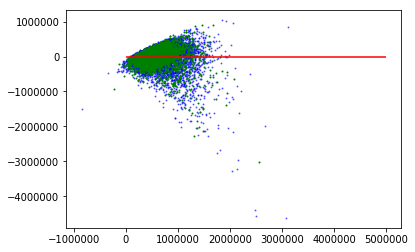

In [38]:
import pandas as pd
df = pd.read_csv('kc_house_data.csv')

#dropping categorical data for now
df = df.drop(['id', 'date', 'zipcode', 'waterfront', 'view', 'condition', 'lat', 'long', 'yr_built', 'yr_renovated'], axis=1)

# Get X matrix and y vector.
X = df.drop(['price'], axis=1).as_matrix()
y = df[['price']].as_matrix()

# Train/test split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the regression model 
lr = LinearRegression()
lr.fit(X_train, y_train)

# Generate predictions for analysis
train_predicted = lr.predict(X_train)
test_predicted = lr.predict(X_test)

# plot residuals against predictions
import matplotlib.pyplot as plt
plt.scatter(train_predicted , train_predicted - y_train, color = 'b', s=1, alpha=0.5)
test_predicted = lr.predict(X_test)
plt.scatter(test_predicted , test_predicted - y_test, color = 'g', s=1)
plt.hlines(y=0, xmin=0, xmax = 5000000, color='r')
plt.show()

In [39]:
from sklearn import metrics

metrics.r2_score(y_test, test_predicted), metrics.explained_variance_score(y_test, test_predicted), metrics.mean_absolute_error(y_test, test_predicted)

(0.55173001487045092, 0.55180877858114208, 162867.93196964572)

Adding grade back into the model improved the model somewhat, but not significantly. If I remove the columns which are essentially duplicate data, the score of the model is not changed significantly:

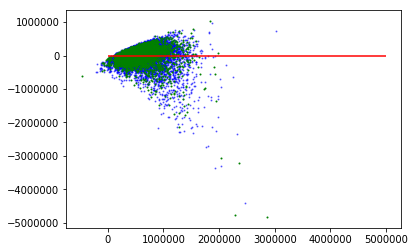

In [40]:
import pandas as pd
df = pd.read_csv('kc_house_data.csv')

#dropping categorical data, except for grade
df = df.drop(['id', 'date', 'zipcode', 'waterfront', 'view', 'condition', 'lat', 'long', 'yr_built', 'yr_renovated'], axis=1)

#dropping potentially less useful predictors
df = df.drop(['sqft_above', 'sqft_living15', 'sqft_lot15', 'floors', 'bedrooms', 'bathrooms', 'floors', 'sqft_lot', 'sqft_basement'], axis=1)

# Get X matrix and y vector.
X = df.drop(['price'], axis=1).as_matrix()
y = df[['price']].as_matrix()

# Train/test split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the regression model 
lr = LinearRegression()
lr.fit(X_train, y_train)

# Generate predictions for analysis
train_predicted = lr.predict(X_train)
test_predicted = lr.predict(X_test)

# plot residuals against predictions
import matplotlib.pyplot as plt
plt.scatter(train_predicted , train_predicted - y_train, color = 'b', s=1, alpha=0.5)
test_predicted = lr.predict(X_test)
plt.scatter(test_predicted , test_predicted - y_test, color = 'g', s=1)
plt.hlines(y=0, xmin=0, xmax = 5000000, color='r')
plt.show()

In [41]:
from sklearn import metrics

metrics.r2_score(y_test, test_predicted), metrics.explained_variance_score(y_test, test_predicted), metrics.mean_absolute_error(y_test, test_predicted)

(0.52987876989654947, 0.52992529981674952, 164367.3233723474)

### 5. Think about how you might use zip code to make a better model. How can we organize the 70 zip codes to provide insight into price diferentiation without adding 69 dimensions to the model?
We can organize the zip codes into categories based on average price and then use this new category column to improve our model

In [42]:
#find the average price by zip code
import pandas as pd
df = pd.read_csv('kc_house_data.csv')
#group zip codes by average price
dfbyzip = df[['zipcode', 'price']].groupby('zipcode').mean() \
    .agg({ 'price': int})
dfbyzip.sort_values(['price'], ascending=[True], inplace=True)
dfbyzip.columns = ['avg_price']
dfbyzip

,avg_price
zipcode,
98002,234284
98168,240328
98032,251296
98001,280804
98148,284908
98023,286732
98188,289078
98003,294111
98030,296187


Based on eyeballing the results, I will divide the zip codes into the following categories based on average price for the zip code:

(cheap) < \$400,000 = 1

(mid) \$400,000 - \$599,999 = 2

(expensive) > \$700,000 = 3

In [43]:
import numpy as np
dfbyzip['zip_cat'] = np.where(dfbyzip['avg_price'] < 400000, 1, 0)
dfbyzip['zip_cat'] = np.where(dfbyzip['avg_price'] >= 400000, 2, dfbyzip['zip_cat'])
dfbyzip['zip_cat'] = np.where(dfbyzip['avg_price'] >= 600000, 3, dfbyzip['zip_cat'])
dfbyzip

,avg_price,zip_cat
zipcode,,
98002,234284,1
98168,240328,1
98032,251296,1
98001,280804,1
98148,284908,1
98023,286732,1
98188,289078,1
98003,294111,1
98030,296187,1


The zip_cat column needs to be added to the original dataframe

In [44]:
df = df.merge(dfbyzip, how='inner',left_on='zipcode', right_index=True)
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'avg_price', 'zip_cat'],
      dtype='object')

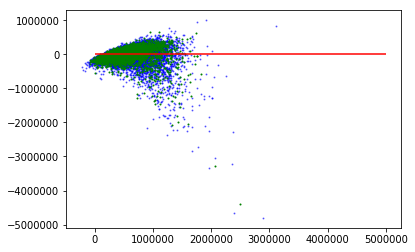

In [45]:
#dropping categorical data, except for grade
df = df.drop(['id', 'date', 'zipcode', 'waterfront', 'view', 'condition', 'lat', 'long', 'yr_built', 'yr_renovated'], axis=1)

#dropping potentially less useful predictors
df = df.drop(['sqft_above', 'sqft_living15', 'sqft_lot15', 'floors', 'bedrooms', 'bathrooms', 'floors', 'sqft_lot', 'sqft_basement'], axis=1)

#dropping unnecessary column from merge
df = df.drop(['avg_price'], axis=1)

# Get X matrix and y vector.
X = df.drop(['price'], axis=1).as_matrix()
y = df[['price']].as_matrix()

# Train/test split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the regression model 
lr = LinearRegression()
lr.fit(X_train, y_train)

# Generate predictions for analysis
train_predicted = lr.predict(X_train)
test_predicted = lr.predict(X_test)

# plot residuals against predictions
import matplotlib.pyplot as plt
plt.scatter(train_predicted , train_predicted - y_train, color = 'b', s=1, alpha=0.5)
test_predicted = lr.predict(X_test)
plt.scatter(test_predicted , test_predicted - y_test, color = 'g', s=1)
plt.hlines(y=0, xmin=0, xmax = 5000000, color='r')
plt.show()

In [46]:
from sklearn import metrics

metrics.r2_score(y_test, test_predicted), metrics.explained_variance_score(y_test, test_predicted), metrics.mean_absolute_error(y_test, test_predicted)

(0.62659224956464876, 0.62694561017560924, 137061.96461768122)

As we can see, this change dramatically improved the model's scores, from approximately 0.55 to approximately 0.63.

#### Increase zip code categories from three to five
This improves the model slightly, as can be seen below:

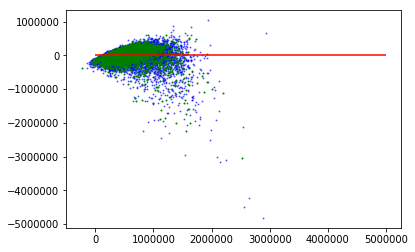

In [47]:
#find the average price by zip code
import pandas as pd
df = pd.read_csv('kc_house_data.csv')
#group zip codes by average price
dfbyzip = df[['zipcode', 'price']].groupby('zipcode').mean() \
    .agg({ 'price': int})
dfbyzip.sort_values(['price'], ascending=[True], inplace=True)
dfbyzip.columns = ['avg_price']

dfbyzip['zip_cat'] = np.where(dfbyzip['avg_price'] < 300000, 1, 0)
dfbyzip['zip_cat'] = np.where(dfbyzip['avg_price'] >= 300000, 2, dfbyzip['zip_cat'])
dfbyzip['zip_cat'] = np.where(dfbyzip['avg_price'] >= 600000, 3, dfbyzip['zip_cat'])
dfbyzip['zip_cat'] = np.where(dfbyzip['avg_price'] >= 800000, 4, dfbyzip['zip_cat'])
dfbyzip['zip_cat'] = np.where(dfbyzip['avg_price'] >= 1000000, 5, dfbyzip['zip_cat'])
df = df.merge(dfbyzip, how='inner',left_on='zipcode', right_index=True)

#dropping categorical data, except for grade
df = df.drop(['id', 'date', 'zipcode', 'waterfront', 'view', 'condition', 'lat', 'long', 'yr_built', 'yr_renovated'], axis=1)

#dropping potentially less useful predictors
df = df.drop(['sqft_above', 'sqft_living15', 'sqft_lot15', 'floors', 'bedrooms', 'bathrooms', 'floors', 'sqft_lot', 'sqft_basement'], axis=1)

#dropping unnecessary column from merge
df = df.drop(['avg_price'], axis=1)

# Get X matrix and y vector.
X = df.drop(['price'], axis=1).as_matrix()
y = df[['price']].as_matrix()

# Train/test split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the regression model 
lr = LinearRegression()
lr.fit(X_train, y_train)

# Generate predictions for analysis
train_predicted = lr.predict(X_train)
test_predicted = lr.predict(X_test)

# plot residuals against predictions
import matplotlib.pyplot as plt
plt.scatter(train_predicted , train_predicted - y_train, color = 'b', s=1, alpha=0.5)
test_predicted = lr.predict(X_test)
plt.scatter(test_predicted , test_predicted - y_test, color = 'g', s=1)
plt.hlines(y=0, xmin=0, xmax = 5000000, color='r')
plt.show()

In [48]:
from sklearn import metrics

metrics.r2_score(y_test, test_predicted), metrics.explained_variance_score(y_test, test_predicted), metrics.mean_absolute_error(y_test, test_predicted)

(0.67542534380954056, 0.67545480583847994, 132270.81502928707)

The intercept and coefficient for this final model can be seen below:

In [49]:
lr.coef_,lr.intercept_

(array([[    179.67574152,   57447.36600511,  152974.61751448]]),
 array([-643037.23843086]))

### JD-comments

This is excellent work.  

You used multiple metrics to analyze the models.  You could have also used statsmodels OLS and summary, but this is great.

You tried multiple categorizations of the zipcode.  excellent! 

You should also try to think about the statistical properties of the coefficients.  Thats the only thing missing here.  you should be able to improve the score even more by removing columns with poor statistical properties.